In [ ]:
/* A few queries to better understand the data set */
USE tempdb;
GO

SELECT count(*) as number_of_rows FROM [tempdb].[dbo].[day_one];

SELECT 
    count(*) as number_of_groups
FROM [tempdb].[dbo].[day_one]
WHERE [number]  is NULL;

SELECT TOP (100) [Id]
      ,[number]
  FROM [tempdb].[dbo].[day_one];

In [ ]:
/* Total number of calories */
SELECT SUM([number]) as total_calories FROM [tempdb].[dbo].[day_one];

In [ ]:
/* In the data set we have id. we need to find the group boundaries knowing that they end with an empty row (inserted as null.
   The result is the lower and uper boundaries of a group */

USE tempdb;
GO

SELECT 
    LAG([Id], 1) OVER (ORDER BY [Id]) AS PreviousId 
    ,[Id]
    ,[number]
FROM [tempdb].[dbo].[day_one]
WHERE [number]  IS NULL
ORDER BY [Id];

In [108]:
/* test for a single group with manually adding the ids */

USE tempdb;
GO

SELECT 
    SUM([number]) as sum_calories_in_group
FROM [tempdb].[dbo].[day_one]
WHERE [Id] >= 11 AND [Id] <= 13

Commands completed successfully.

Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:00.115

sum_calories_in_group
22990


In [ ]:
/* It is time for some CTEs */

USE tempdb;
GO

/* Define the CTE expression name and column list. */
WITH Groups_CTE (LowerLimit, UpperLimit)
AS
/* Define the CTE query. */
(
    SELECT 
         ISNULL(LAG([Id], 1) OVER (ORDER BY [Id]),1) AS LowerLimit 
        ,[Id] as UpperLimit
    FROM [tempdb].[dbo].[day_one]
    WHERE [number]  IS NULL
)
/* Define the outer query referencing the CTE name. */
SELECT 
     LowerLimit
    ,UpperLimit
    ,(SELECT SUM([number]) FROM [tempdb].[dbo].[day_one] WHERE [Id] >= LowerLimit AND [Id] <= UpperLimit) as Calories_SUM
FROM Groups_CTE ORDER BY LowerLimit

In [11]:
/* the next step is to recude the result set to only one - the max one */

USE tempdb;
GO

/* Define the CTE expression name and column list. */
WITH Groups_CTE (LowerLimit, UpperLimit)
AS
/* Define the CTE query. */
(
    SELECT 
         ISNULL(LAG([Id], 1) OVER (ORDER BY [Id]),1) AS LowerLimit 
        ,[Id] as UpperLimit
    FROM [tempdb].[dbo].[day_one]
    WHERE [number]  IS NULL
)
/* Define the outer query referencing the CTE name. */
SELECT 
    max(Calories_SUM) as maxCalories
    ,sum(Calories_SUM) as top3
FROM (
    SELECT TOP 3
        (SELECT SUM([number]) FROM [tempdb].[dbo].[day_one] WHERE [Id] >= LowerLimit AND [Id] <= UpperLimit) as Calories_SUM
    FROM Groups_CTE ORDER BY Calories_SUM DESC
) as t

Commands completed successfully.

Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:00.327

maxCalories,top3
71506,209603


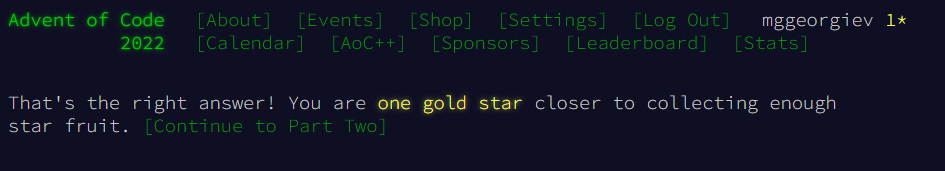

in my set this was indeed the correct answer.

In [ ]:
/* if Brent Ozar had in mind to use single column then we need a step in between
   to split the string into rows */

USE tempdb;
GO

-- Create a new table called '[day_one]' in schema '[dbo]'
-- Drop the table if it already exists
IF OBJECT_ID('[dbo].[day_one_single_row]', 'U') IS NOT NULL
DROP TABLE [dbo].[day_one_single_row]
GO
-- Create the table in the specified schema
CREATE TABLE [dbo].[day_one_single_row]
(
    [Id] INT identity(1,1), -- Primary Key column
    [calories] NVARCHAR(max)
)
GO

USE tempdb;
GO

insert into [dbo].[day_one_single_row] ([calories])
values
(N'6758
5199
10292
8812
3527
10178
1340
2824

62522

22990

6730

7255
3210
3003
8296
8799
7655
10312

18837
19882
5386
15891

4203
36288

1586
2295
4981
2109
2284
5814
4823
5492
1524
5286
2147
2952
4783
4814
3042

8474
4059
14465
13390

4623
2150
7545
7833
3686
2095
3336
5030
7648
4087
4482

31278
29863

1228
4851
2706
1692
3200
3521
5200
3755
3922
5181
5561
5162
5280
2460

1083
4432
4938
4303
6304
3746
3527
3141
3198
4980
4395

8218
3954
1396
2147
7924
4650
4483
6610
4799
3973

3401
4111
7798
5181
8418
5014
5975
7916
7788
1864

8547
13217
9699
5701
11040
2943

6214
3287
4137
6773
2593
4776
1687
2821
7240
3681
1185
6578

7850
6697
4844
2325
1834
6812
3380
2302
2531
4959

5275
1883
6919
2865
7943
7718
9494
7957

28727
22865

3064
4279
2649
12521

10169
16383
3301
12707

3533
2280
9232
10618
1488
7616
4334
7847

4322
1215
3514
5513
3469
5472
3658
1096
3410
1607
5482
3015
5234
2488

1306
8067
3375
4064
2943
6158
3911
7766
2493
4897
6551

10694
13319

10862
2483
8522
4509
5021
8789
6152

7824
23812
6740

6548
2116
14900

3470
1825
2865
4691
4729
4263
4899
4855
3732
4439
5023
1291
3121
5322

6529

5141
2353
8515
9815
9541
10389
1114
1373

11924
11446
20373

37249

5749
2968
5300
5405
7280
6161
4298
7104
7140
3405
5754

4763
11364
7492
5630
15978

3622
2185
12718
2466
5015
11302

65579

5450
6455

5721
1939
8537
7075
1317
1805
1701
4578
8435
1718

10692
6581
3068
9013
1741
4654
2159
5340

4981
6327
6931
3024
1263
4313
6793
2818
6727
2245
4524
5825

10156
11779
1694
7495
1615
8872
11840

7323
7184
4094
3989
1820
2141
7277
3208
2064
7765
5764

2796
3030
2783
3426
5581
1659
2369
2784
5284
4110
1157
3129
6088
2215
3503

20991
1521

1601
4869
9195
1835
5402
2721
1128
1991
9336

2557
6635
6981
6296
5278
3077
7679
5764
2359
2467
6705

2594
2611
3189
1436
1510
1341
8213
8525
5447
2045

3812
2106
6216
3236
7169
5840
4770
1724
1061
5062
7990

5722
4372
3524
1561
3417
5807
3969
3635
3067
3469
4393
1705
4897
4307
2663

28920
3093

12949
9070
9161
3530
6651

12010
1783
21165

4667
3553
6938
5433
3244
1082
7305
7262
6577
1987
2256

4933
1802
1315
1303
1722
2688
6103
2749
1478
4994
4369
5074
5655
2827
3232

1101
2284
4349
4868
3264
3227
1786
5233
6054
6144
3533
1841
1721
4775

16514

7282
7260
2423
1738
4498
5570
3862
3979
3845
4313
3249
5639

7910
9862
7476
9103
2851
3634
8641
7369

8574
1439
1442
12337
1387
7777

18060

10287
1924
4066
12275
14094

4797
5061
2701
1391
6617
5870
4999
4150
2881
2667
2461
1978
1058

12911
7290
9442
2875
5812

13016
4985
2517
9758
11215

2845
11805
6418
8128
1604

9643
6574
6804
3575
9226
6276
1406
4493
8104

11616
7196
5685
1267
3281
1250
7666

9654
8646
7144
2790
7583
2681
1799
5301
1714

30086
23066

10205
7316
1550
4056
2627
10056

9912
1615
1584
2963
1347
9336
8310
8728

2436
4741
6665
5239
5737
4252
1954
4916
5341
7475
5909
5012

4897
8580
5122
1865
8318
5369
2334
5629
7058

14621
2969
15900
14828
2997

7051
3305
7848
7947
3961
3206
5175
7055
3182
5838
1954

6614
3086
7740
6624
4106
7195

3815
4858
3460
1427
5685
5865
4790
6660
1510
5685
2790
5112

13626
1665
16722
9598

15870

3453
8531
9997
8590
5833
7896
8524

6783
5931
3245
4327
5496
5017
2136
3899
3875
2904
5023
3173
3227

4241
4693
1164
1877
5541
5017
3433
3333
4734
3639
1724
2439
1673
4362

6479
3259
3496
6125
1147
3181
3948
5746
3019
1924

6250
26443

4901
6813
6581
3144
1525
6629
3254
6542
1156
6663
3856
4083
1598

7932
8717
9657
1873
2727
2052
2376

6455
13127
3540
8038
6601
2249

6226
5251
3416
5941
7336
5668
4139
1459
2529
7538

6899
4680
10277
2515
16361

23283
2647

1272
3462
6817
3795
4973
6750
2340
7379
3873
1832
7935

4808
4018
11801
7092
8312
9718
6693

7285
7822
7063
2854
7844
1121
4362
4685
5360
7140
6796

17114
20195
9330

19378
27739

16288
15298
13251
5444
10856

7616
6108
3420
9201
3422
4312
4388
3008
9551

1255
7803
1598
3892
6954
7936
8078
5261
2057
2914

7497
10296
2343
10020
1171
3092
2333

1492
4718
4267
10309
7919
7080
1012
9981

17367
1357
16269
7775

13641
3004
13280

6205
3003
1634
4608
2759
6324
4372
4833
6565
2865
7345
3719

4268
2071
2155
4408
4869
2634
1329
2075
4276
4032
2129
5181
2594
2102
2281

2486
7483
6748
4017
5926
3507
4666
3837

8082
13626
12247
5622
13565

7911
1180
1854
5795
7017
6873
7728
5055
5207
7810
7474

3459
5418
1420
5028
6793
4851
2885
2263
2734
4868
6596
1434
5440

3368
3541
5756
3039
4234
2632
6031
5613
4769
1538
4898
5128
4848

2817
3013
2260
4714
6461
3262
3924
4083
2487
4221
5311
4274
5591
1625

8756
8549
9481
7994
7775
6951
5276
7598
9126

11749
7152
14494

14395
7799
16109
14178

24404
4941

5326
9070
3951
1404
6513
9155
5981
3880
1476

12661
10966

3517
7760
4724
6891
1447
3337
3903
7382
7067
1771
1184

3556
13458
12699
12330
13534
11244

10818
31380

17968
3978
17994

9486
6163
1748
3765
7191
1461
2062
8169
9167

3111
4378
3560
6292
5521
2132
5071
4519
1977
6587

11961
2119
11633
10970
4089
7390
6481

4350
5261
4801
1584
1531
5034
5917
4136
6668
5364
3814
3873
4437

2568
2449
5582
1857
6143
5457
4396
3723
2885
2428
2790
4173
1726
5687

21758

32901

4313
12688
14465
1073
6568

2295
3872
5979
3014
1408
1865
2937
4231
5076
2544
3270
2673
6060
4292
1073

5340
10378
10445
11874
8275
8558
1558

3652
9630
15612
18471

5856
4627
4762
6094
5266
2970
1230
6292
5083
4557
6158
5841
6321
3672

4531
2204
4583
4426
4310
6136
5577
4765
6882
1300
2979
6754
4241

3266
6610
2322
12666
11874
10495

7493
2468
2710
6550
7383
4442
3692
8168

4381
3648
4270
3016
4178
3066
1736
5402
4995
1980
5438
5256
4804
4854
2585

4096
4397
4061
3811
2537
3296
1877
4267
2760
3682
5949
3713
3365
4135
1310

30319

7244
6071
1234
6387
1980
1935
3431
6474
6601
1652

10125
11599

4436
3242
6077
6707
1582
6648
3345
5812
1635
2782
2514
2608

9244
1348
5019
2059
9226
2546
5130
8902
7779

10030
10749
3690
8769
9835
7216
2132

6105
1205
1860
3190
5815
1424
2611
1230
4491
1731
5804
2863
1816
3694

4791
6491
3292
3310
2223
4296
6323
3414
1462
6799
3276
4435
5554

2859
2854
1127
4179
6233
6219
5955
3139
2457
3854
5071
4887
4190
4469

67818

7880
6503
4931
5813
1692
2126
6300
8743
4983
2182

1882
5752
6369
1996
2955
5978
6087
5123
2587
2000
4973
2214
5118
3178

10807
9780
8468
2157
1021
8078
4848

3400
1666
6908
10199
1685
4979

2250
5672
2505
9061
5514
8895
4958
8274
7707

15083
2359
23052

6279
1563
4247
4593
4844
5335
7024
7324
5904
1016
3394
3382

2965
2673
3329
1833
1222
1789
1027
6268
4404
1031
1407
4510
4047
1972

4423
8018
4991
7190
7061
6223
5972
2864
5674

1559
1850
4117
1495
2604
2243
1498
4936
2970
4109
1252
6416
5293
3319

5577
4032
3528
6140
5994
2811
3247
7297
5776
3863
4240
3973

9884
8267

3047
4053
2400
4246
3193
2309
4014
1369
1437

10529
2975
3033
10601
13985

12323
9086
2903
7243
8351
12729

13982
7013
7500
11098
9206

11963
3055
9862
2601
13991

66684

6171
1924
1569
3761
4616
5565
3644
1817
4029
2333
1934
2492
6161

2802
1498
3232
7475
5503
4913
6759
8657
4445

18324
19871

6287
4271
7871
1097
1932
5980
5376
7824
4911
4751
6453

8374
3293
7175
8288
1217
4831
1514
6681
2596
6199

32039

1235
2206
6429
4880
5463
6814
1530
3544
4685
3169
6752
5854
6764

6115
6039
6519
6414
4558
5214
4411
2882
6006
5117
5321
2059

2431
5892
1839
5352
3295
2768
4788
5271
1503
1173
4691
4906
4346
1043

5172
5976
6248
4288
3851
8543
4189
4396

10361
14864
18037

7381
5180
1829
3624
3144
3962
5923
4356
1477
3153
2891
5196

3143
3180
4428
3418
6243
3480
1151
4262
4958
4641
3823
1469
2149

3702
4159
3799
4639
5703
2425
4579
2397
2814
3959
3987
3088
2982
2338
3432

7256
16171
12417
11290
13105

2594
5105
6253
4743
4251
6439
3370
5662
2763
3147
6366
4537
6279
6104

7926
3430
2206
4334
5226
1817
2404
2587
8020
1849

1257
6091
2485
6366
3184
4775
5987
3473
5761
1905
3742
5478
5343

3336
5819
2617
2756
5602
3921
4660
5041
1471
2297
5575
1473
6059
3111
5789

2647
6183
5004
2750
2772
1964
4453
2132
3181
2916
1804
4666
1215
6354

1449
1539
3005
3167
1712
6222
6007
4141
1481
6198
4476
3850
3885
5880

1833
5557
3185
6117
3456
2789
4576
1439
3212
5223
2687
2368
3270
4629
4716

10123
6686
12658

6838
4415
10796
6040
3065
1832
11624

69368

5469
8816
7624
13506

8923
1621
10042

6113
9373
9212
7054
3193
6588
7743
4224
4983

1911
1589
2667
3095
3768
5898
4574
3456
3281
4176
1591
3383
5063

1378
5923
9019
4379
2932
3918
9631

7851
6466
2388
13209
7613
2396

3015
1119
4172
2459
3872
5912
4012
2894
2765
1950
4147
4523
2504
4691
2038

4472
5029
3599
6237
8566
3508
7995
3756
6631
3625

16549
15550
22868

7356
11800
8330
14503
9470

1306
1960
6574
7234
3841
1006
4156
2019
6187
2494
7475
5916

8894
9358
9666
8711
10140
11205

8123
19317
11676
7989

7610
3163
9789
6331
6998
7288
4632
5340

7105
15276
22300

11919
6212
5062

18496
10383
10695
4206

8127
2277
10392
1337
2779
5380
3881
6556

5514
6678
2324
4686
3807
4785
3972

1488
3662
4866
2687
3519
2605
5189
5313
4112
2559
1887
5656
5931
1816

9949
11409
8427
15008
2241

1942
1004
1070
5860
4932
4055
2922
5129
1232
4940
5270
1023
5323
2002
2727

48445

6687
4155
2999
3348

5347
4592
1463
3080
3520
5283
3166
2945
2891
1100
5372
5797
3060
5748
5592

8132
3941
7625
4458
2714
7390
4305
1612
6707

2105
2880
6683
6257
6472
1371
3493
1542
4431
5003
3276
2205
3417

6421
4279
1213
6274
3757
6856
3244
1554
2716
1854
1924
3769
6344

1081
2601
2607
6042
1967
2924
4656
6462
1747
4278
6384
4427
5074
6454

6344
13912
15708
1335
5433

5862
7799
3707
9404
10527
10543
6428

2009
17261
13328

10389
9214
9189
8747
12720
9443

7162
2362
3837
8891
2098
8577
9063
3336
5023

1322
12214
5387
9804
9542
6149

1997
6709
6614
5116
6691
5904
5563
2437
4442
7346
5749
7194

5836
15439
9020
9124

6761
4892
5956
2500
6879
1980
1908
1705
6157
4559
5776
1235
3077

10155
8529
7837
7027
7897
6504
4192
7193

9711
17664
4069
10400

24373
20215

2155
9371
9201
5590
9806
13380

7716
1116
6106
2703
2403
3549
3740
6658
4769

13954
36130

1767
7955
5622
5077
2512
8206
4501
2917
9336

1601
23493
16981

3719
2266
1982
4557
3198
3815
5006
2587
4173
2965
2658
4890
5723
4231

19350

19637
13784
21672

17040
29745

2037
7872
5766
7919
1382
9398
3197

11570
12560
6206
12642
3275

1535
6685
5587
12955
12197

2980
15784
12178
12996

7928
8780
7528
5428
8181
8527
5229
3850
2012
2975

30992
26372

4384
2425
2332
1309
3899
3062
4825
1428
1116
3635
1669
1922
5941
4378
2742

1961
4243
4443
3070
5786
3638
6330
2461
1612
4572
3551
3831
3263
6173

2759
3889
5197
4293
2957
6305
3797
1465
4674
5659
5258
3775
4436
2260

5141
8383
6249
9982
4848
2675
4232
8974

11489
11733
9990
4150
4533
3032
1044

62338

3645
5406
4672
3889
5799
5760
4356
5557
4120
2771
3399
5292
3640
3989
6047

4629
6897
4312
2108
5301
1122
1893
5508
3414
2180
4254');

In [1]:
USE tempdb;
GO

SELECT TOP (1000) [Id]
      ,[calories]
  FROM [tempdb].[dbo].[day_one_single_row];

SELECT * FROM STRING_SPLIT((select [calories] FROM [tempdb].[dbo].[day_one_single_row]), CHAR(10) );

/* From there it is the same a s the solution above */

Commands completed successfully.

(1 row affected)

(2255 rows affected)

Total execution time: 00:00:00.814

Id calories 1 6758
5199
10292
8812
3527
10178
1340
2824

62522

22990

6730

7255
3210
3003
8296
8799
7655
10312

18837
19882
5386
15891

4203
36288

1586
2295
4981
2109
2284
5814
4823
5492
1524
5286
2147
2952
4783
4814
3042

8474
4059
14465
13390

4623
2150
7545
7833
3686
2095
3336
5030
7648
4087
4482

31278
29863

1228
4851
2706
1692
3200
3521
5200
3755
3922
5181
5561
5162
5280
2460

1083
4432
4938
4303
6304
3746
3527
3141
3198
4980
4395

8218
3954
1396
2147
7924
4650
4483
6610
4799
3973

3401
4111
7798
5181
8418
5014
5975
7916
7788
1864

8547
13217
9699
5701
11040
2943

6214
3287
4137
6773
2593
4776
1687
2821
7240
3681
1185
6578

7850
6697
4844
2325
1834
6812
3380
2302
2531
4959

5275
1883
6919
2865
7943
7718
9494
7957

28727
22865

3064
4279
2649
12521

10169
16383
3301
12707

3533
2280
9232
10618
1488
7616
4334
7847

4322
1215
3514
5513
3469
5472
3658
1096
3410
1607
5482
3015
5234
2488

1306
8067
3375
4064
2943
6158
3911
7766
2493
4897
6551

10694
13319

10862
2483
8522
4509
5021
8789
6152

7824
23812
6740

6548
2116
14900

3470
1825
2865
4691
4729
4263
4899
4855
3732
4439
5023
1291
3121
5322

6529

5141
2353
8515
9815
9541
10389
1114
1373

11924
11446
20373

37249

5749
2968
5300
5405
7280
6161
4298
7104
7140
3405
5754

4763
11364
7492
5630
15978

3622
2185
12718
2466
5015
11302

65579

5450
6455

5721
1939
8537
7075
1317
1805
1701
4578
8435
1718

10692
6581
3068
9013
1741
4654
2159
5340

4981
6327
6931
3024
1263
4313
6793
2818
6727
2245
4524
5825

10156
11779
1694
7495
1615
8872
11840

7323
7184
4094
3989
1820
2141
7277
3208
2064
7765
5764

2796
3030
2783
3426
5581
1659
2369
2784
5284
4110
1157
3129
6088
2215
3503

20991
1521

1601
4869
9195
1835
5402
2721
1128
1991
9336

2557
6635
6981
6296
5278
3077
7679
5764
2359
2467
6705

2594
2611
3189
1436
1510
1341
8213
8525
5447
2045

3812
2106
6216
3236
7169
5840
4770
1724
1061
5062
7990

5722
4372
3524
1561
3417
5807
3969
3635
3067
3469
4393
1705
4897
4307
2663

28920
3093

12949
9070
9161
3530
6651

12010
1783
21165

4667
3553
6938
5433
3244
1082
7305
7262
6577
1987
2256

4933
1802
1315
1303
1722
2688
6103
2749
1478
4994
4369
5074
5655
2827
3232

1101
2284
4349
4868
3264
3227
1786
5233
6054
6144
3533
1841
1721
4775

16514

7282
7260
2423
1738
4498
5570
3862
3979
3845
4313
3249
5639

7910
9862
7476
9103
2851
3634
8641
7369

8574
1439
1442
12337
1387
7777

18060

10287
1924
4066
12275
14094

4797
5061
2701
1391
6617
5870
4999
4150
2881
2667
2461
1978
1058

12911
7290
9442
2875
5812

13016
4985
2517
9758
11215

2845
11805
6418
8128
1604

9643
6574
6804
3575
9226
6276
1406
4493
8104

11616
7196
5685
1267
3281
1250
7666

9654
8646
7144
2790
7583
2681
1799
5301
1714

30086
23066

10205
7316
1550
4056
2627
10056

9912
1615
1584
2963
1347
9336
8310
8728

2436
4741
6665
5239
5737
4252
1954
4916
5341
7475
5909
5012

4897
8580
5122
1865
8318
5369
2334
5629
7058

14621
2969
15900
14828
2997

7051
3305
7848
7947
3961
3206
5175
7055
3182
5838
1954

6614
3086
7740
6624
4106
7195

3815
4858
3460
1427
5685
5865
4790
6660
1510
5685
2790
5112

13626
1665
16722
9598

15870

3453
8531
9997
8590
5833
7896
8524

6783
5931
3245
4327
5496
5017
2136
3899
3875
2904
5023
3173
3227

4241
4693
1164
1877
5541
5017
3433
3333
4734
3639
1724
2439
1673
4362

6479
3259
3496
6125
1147
3181
3948
5746
3019
1924

6250

value
6758
5199
10292
8812
3527
10178
1340
2824
""
62522
